In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
df= pd.read_csv(r'C:\Users\49173\Desktop\vehicles.csv')


In [3]:
df= df.drop(columns=['region','id','url','image_url', 'lat', 'long', 'region_url', 'description', 'state', 'vin','county'], axis=1)


In [25]:
list(df)


['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [4]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,34200300,67.115
condition,23193400,45.515
cylinders,19968300,39.186
paint_color,16470600,32.322
drive,14414300,28.287
type,14153100,27.774
odometer,9232400,18.118
manufacturer,2276400,4.467
model,798900,1.568
fuel,398500,0.782


In [5]:
df[df.price == 0].shape

(43579, 14)

In [6]:
df[df.price > 100000].shape

(467, 14)

In [7]:
df[df.price < 750].shape


(54695, 14)

In [8]:
df=df[(df.price < 100000) & (df.price >= 750 )]
df.shape

(454397, 14)

In [9]:

df[df.odometer < 1000].shape

(7300, 14)

In [10]:
df[df.odometer < 1000].sample(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
140763,4700,2004.0,lincoln,navigator 4wd luxury,good,8 cylinders,gas,190.0,clean,automatic,4wd,NaN,SUV,NaN
147797,3950,2005.0,jeep,grand cherokee limited 4x4,NaN,8 cylinders,gas,160.0,clean,automatic,4wd,NaN,SUV,NaN
65071,23777,2017.0,lexus,ct 200h,NaN,NaN,hybrid,30.0,clean,automatic,fwd,NaN,sedan,NaN
21557,23920,2020.0,mitsubishi,outlander sport,NaN,4 cylinders,gas,6.0,clean,automatic,4wd,NaN,SUV,NaN
464972,6595,2003.0,ford,mustang,NaN,6 cylinders,gas,1.0,salvage,automatic,rwd,NaN,convertible,silver
267389,2700,2008.0,pontiac,g6 4 door,NaN,NaN,gas,198.0,clean,automatic,NaN,NaN,NaN,NaN
120401,9100,2008.0,chevrolet,suburban ls 4x4,good,8 cylinders,gas,123.0,clean,automatic,NaN,NaN,NaN,NaN
67249,68500,2020.0,toyota,supra,new,6 cylinders,gas,50.0,clean,other,rwd,NaN,hatchback,blue
168955,17500,1988.0,chevrolet,s-10,excellent,8 cylinders,gas,700.0,clean,automatic,rwd,mid-size,truck,orange
240143,11999,2012.0,NaN,Forest River Hemisphere Lite,excellent,NaN,other,1.0,clean,automatic,NaN,NaN,NaN,white


In [11]:
df[df.odometer >300000].shape

(2607, 14)

In [13]:

df=df[(df.odometer < 300000) & (df.odometer > 1000)]
df=df[df.year>1985]
df.shape

(361516, 14)

In [14]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23332400,64.540
condition,14846100,41.066
cylinders,12293600,34.006
paint_color,8853800,24.491
drive,7359100,20.356
type,6892400,19.065
manufacturer,1013100,2.802
model,336000,0.929
transmission,303100,0.838
fuel,297100,0.822


In [15]:
df['condition'].isnull().sum()


148461

In [16]:
df.loc[(df['year'] >= 2017)]['condition'].isnull().sum()


27595

In [17]:
df.condition.value_counts()


excellent    108434
good          77727
like new      20521
fair           5533
new             518
salvage         322
Name: condition, dtype: int64

In [18]:

df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.loc[df.year>=2017, 'condition'] = df.loc[df.year>=2017, 'condition'].fillna('like new')

In [19]:
df.condition.value_counts()


excellent    108434
good          77727
like new      43786
fair           5533
new            4848
salvage         322
Name: condition, dtype: int64

In [20]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [21]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].value_counts()

like new     28019
excellent    21199
good         16807
new           4563
fair            95
salvage         36
Name: condition, dtype: int64

In [22]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [23]:

null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23332400,64.540
cylinders,12293600,34.006
paint_color,8853800,24.491
drive,7359100,20.356
type,6892400,19.065
manufacturer,1013100,2.802
model,336000,0.929
transmission,303100,0.838
fuel,297100,0.822
title_status,241700,0.669


In [24]:
df.cylinders.value_counts()

6 cylinders     87364
4 cylinders     74964
8 cylinders     71261
5 cylinders      2223
10 cylinders     1437
other             794
3 cylinders       400
12 cylinders      137
Name: cylinders, dtype: int64

In [26]:
df['transmission'] = df['transmission'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df['title_status'] = df['title_status'].fillna(method='ffill')
df['fuel'] = df['fuel'].fillna(method='ffill')
df['size'] = df['size'].fillna(method='ffill')
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['manufacturer'] = df['manufacturer'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')
df['model'] = df['model'].fillna(method='ffill')

In [27]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [29]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


In [30]:
df.shape


(361516, 14)

In [31]:
df.sample(40)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
78794,24988,2012.0,jeep,wrangler,good,6 cylinders,gas,68110.0,clean,automatic,4wd,full-size,SUV,black
7464,19499,2013.0,jeep,wrangler,excellent,6 cylinders,gas,116789.0,clean,automatic,4wd,full-size,SUV,silver
371832,26995,2017.0,chevrolet,silverado,like new,4 cylinders,other,33056.0,clean,automatic,4wd,compact,pickup,black
35704,10497,2014.0,ford,flex,excellent,6 cylinders,gas,126379.0,clean,automatic,fwd,mid-size,SUV,black
43023,7900,2012.0,ford,focus,good,4 cylinders,gas,96828.0,clean,automatic,fwd,full-size,hatchback,black
312767,3250,2005.0,ford,focus,excellent,4 cylinders,gas,116429.0,clean,automatic,fwd,full-size,sedan,silver
125492,9999,2012.0,toyota,camry hybrid,excellent,6 cylinders,hybrid,106000.0,clean,automatic,fwd,compact,sedan,black
500625,14295,2018.0,nissan,altima,like new,4 cylinders,gas,47910.0,clean,automatic,fwd,mid-size,sedan,grey
501155,22995,2015.0,lexus,is 350,excellent,6 cylinders,gas,89359.0,clean,automatic,rwd,compact,sedan,grey
425461,10927,2009.0,honda,cr-v,excellent,4 cylinders,other,103026.0,clean,automatic,4wd,full-size,SUV,silver


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

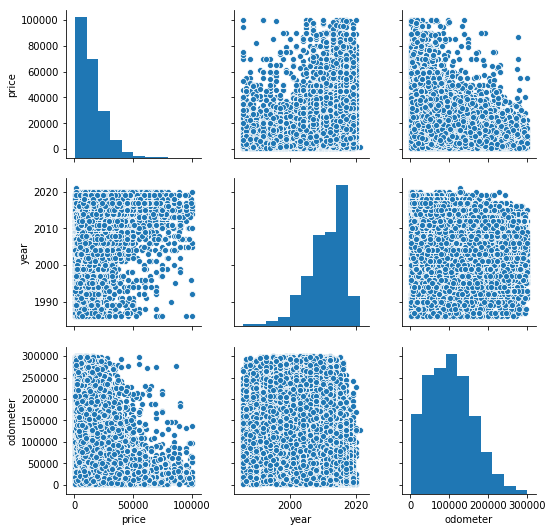

In [33]:
sns.pairplot(df)


In [34]:
df.set_index(['price', 'year']).sample(5)


,,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
price,year,,,,,,,,,,,,
18998,2017.0,ford,escape,like new,8 cylinders,gas,45632.0,clean,automatic,fwd,mid-size,SUV,black
21159,2016.0,nissan,pathfinder,excellent,6 cylinders,gas,47000.0,clean,automatic,fwd,full-size,SUV,black
20700,2016.0,dodge,challenger sxt coupe 2d,good,6 cylinders,gas,33410.0,clean,other,rwd,full-size,coupe,black
6000,2008.0,subaru,impreza,excellent,4 cylinders,gas,92456.0,clean,manual,4wd,compact,sedan,silver
4495,2010.0,chevrolet,hhr lt,good,4 cylinders,other,116242.0,clean,automatic,fwd,mid-size,wagon,black


In [35]:
df.sort_values('year').sample(10)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
212774,6900,2010.0,acura,tl,good,6 cylinders,gas,150000.0,clean,automatic,fwd,mid-size,sedan,black
299180,13995,2016.0,chevrolet,equinox lt,excellent,4 cylinders,gas,19047.0,rebuilt,automatic,4wd,mid-size,SUV,black
146295,10499,2012.0,ram,versa,salvage,4 cylinders,gas,118033.0,clean,automatic,fwd,compact,pickup,blue
87,7995,2014.0,toyota,corolla,excellent,4 cylinders,gas,69260.0,clean,automatic,fwd,compact,sedan,silver
391228,16982,2016.0,buick,encore,like new,4 cylinders,gas,26673.0,clean,automatic,4wd,compact,SUV,white
213903,6999,2008.0,acura,rdx sh-awd,salvage,8 cylinders,gas,121188.0,clean,automatic,4wd,compact,SUV,silver
438191,3950,1996.0,gmc,k2500,good,8 cylinders,gas,175000.0,clean,automatic,4wd,full-size,pickup,green
486443,9909,2015.0,ford,fusion,salvage,4 cylinders,gas,125468.0,clean,automatic,fwd,mid-size,sedan,brown
319129,32998,2015.0,ford,f-150,excellent,6 cylinders,gas,70778.0,clean,automatic,4wd,full-size,truck,red
478591,21229,2014.0,cadillac,srx performance,good,6 cylinders,gas,38858.0,clean,automatic,fwd,compact,other,black


In [36]:
df.to_csv('cars_cleaned.csv', index=False)